In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

final_dict = dict()

#Condense Data

tax_dict = dict()
tax_data = pd.read_csv("tax.tsv", sep = "\t", chunksize=1)

#access necessary data
for chunk in tax_data:
    hood = chunk["neighborhood"].iloc[0]
    current_tax = float(chunk["current_delq_tax"].iloc[0])
    current_interest = float(chunk["current_delq_pi"].iloc[0])
    prior_tax = float(chunk["prior_delq_tax"].iloc[0])
    prior_interest = float(chunk["prior_delq_pi"].iloc[0])

    #put data in Dictionary (key: String, value: 6-tuple)
    if hood in tax_dict:
        tax_dict[hood][0] += current_tax
        tax_dict[hood][1] += current_interest
        tax_dict[hood][2] += prior_tax
        tax_dict[hood][3] += prior_interest
        tax_dict[hood][4] += (current_tax + current_interest)
        tax_dict[hood][5] += (current_tax + current_interest + prior_tax+prior_interest)
    else:
        tax_dict[hood] = [current_tax, current_interest, prior_tax, prior_interest, current_tax+current_interest, (current_tax + current_interest + prior_tax+prior_interest)]


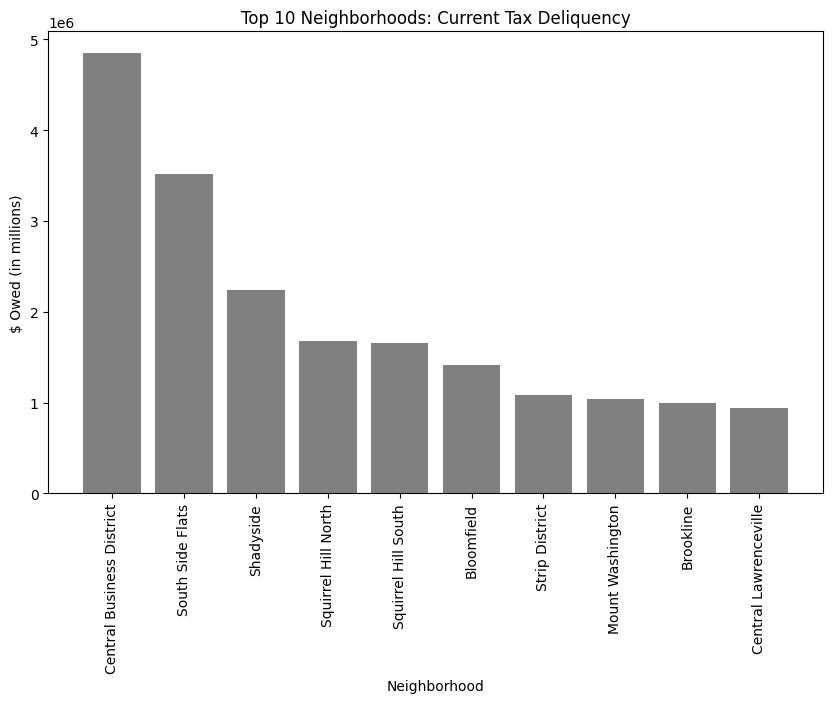

In [2]:
#Current Tax, Penalties, Interest Graph

#sorts each neightborhood by total firearm seizures in descending order for top 10
sort = sorted(tax_dict.items(), key=lambda x: x[1][4], reverse=True) 

#gets each neighborhood label and positions them
x = [key[0] for key in sort[:10]]
x_spacing = np.arange(len(x))

#gets each bar height
y = [value[1][4] for value in sort[:10]] 

#create bar graph
plt.figure(figsize=(10,6))
plt.bar(x, y, color="gray")

#add details and display
plt.title("Top 10 Neighborhoods: Current Tax Deliquency")
plt.xlabel("Neighborhood")
plt.ylabel("$ Owed (in millions)")
plt.xticks(x_spacing, x, rotation=90)
plt.show()

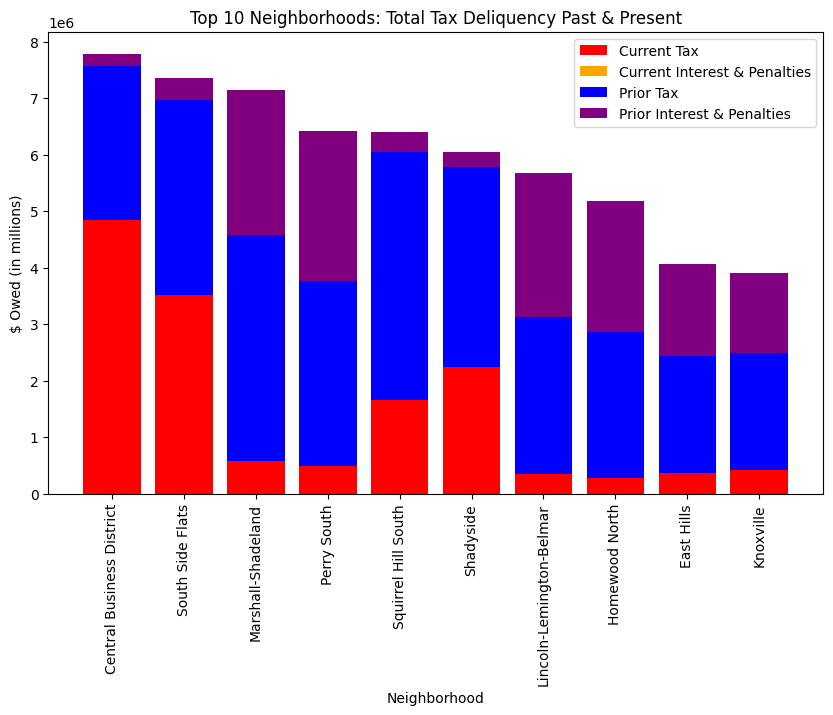

In [3]:
#Current Tax, Penalties, Interest + Prior Tax, Penalties, Interest Graph 

#sort each neighborhood by the weighted firearm seizures in descending order
sort = sorted(tax_dict.items(), key=lambda x: x[1][5], reverse=True)

#array of each bar height for respective neighborhood by type for top 10
current_tax_height = [value[1][0] for value in sort[:10]]
current_interest_height = [value[1][1] for value in sort[:10]]
prior_tax_height = [value[1][2] for value in sort[:10]]
prior_interest_height = [value[1][3] for value in sort[:10]]

#tells the location of the bottom of each stack
current_tax_stack = np.array(current_tax_height)
current_interest_stack = current_tax_stack+ np.array(current_interest_height)
prior_tax_stack = current_interest_stack + np.array(prior_tax_height)
prior_interest_stack = prior_tax_stack + np.array(prior_interest_height)

#gets each neighborhood label and positions them
x = [item[0] for item in sort[:10]]
x_spacing = np.arange(len(x))

#adds the bars to graph
plt.figure(figsize=(10, 6))
plt.bar(x_spacing, current_tax_height, color="red", bottom = 0,  label="Current Tax")
plt.bar(x_spacing, current_interest_height, color="orange", bottom = current_tax_stack, label="Current Interest & Penalties")
plt.bar(x_spacing, prior_tax_height, color = "blue", bottom=current_interest_stack, label="Prior Tax")
plt.bar(x_spacing, prior_interest_height,color="purple", bottom=prior_tax_stack, label="Prior Interest & Penalties")


#add details to graph
plt.title("Top 10 Neighborhoods: Total Tax Deliquency Past & Present")
plt.xlabel("Neighborhood")
plt.ylabel("$ Owed (in millions)")
plt.xticks(x_spacing, x, rotation=90)
plt.legend()
plt.show()

# Export ranked list of neighborhoods by weighted tax delinquency

# Build DataFrame from sorted tax_dict data
ranked_data = [
    (item[0], item[1][5]) for item in sort
    if isinstance(item[0], str) and item[0].strip()
]
ranked_df = pd.DataFrame(ranked_data, columns=["Neighborhood", "Delinquency"])
ranked_df["Rank"] = range(1, len(ranked_df) + 1)
ranked_df = ranked_df[["Neighborhood", "Rank"]]

# Export to tsv for further  processing
ranked_df.to_csv("tax_ranked.tsv", sep="\t", index=False)


In [4]:
#Condense Data

fire_data = pd.read_csv("firearm.tsv", sep = "\t", chunksize = 1)

fire_dict = dict()

#access necessary data
for chunk in fire_data:
    hood = chunk["neighborhood"].iloc[0]
    total = int(chunk["total_count"].iloc[0])
    other = int(chunk["other_count"].iloc[0])
    rifle = int(chunk["rifle_count"].iloc[0])
    shotgun = int(chunk["shotgun_count"].iloc[0])
    pistol = int(chunk["pistol_count"].iloc[0])
    revolver = int(chunk["revolver_count"].iloc[0])

    #put data in dictionary (key: String, value: 7-tuple)
    if hood in fire_dict:
        fire_dict[hood][0] += total
        fire_dict[hood][1] += rifle
        fire_dict[hood][2] += shotgun
        fire_dict[hood][3] += other
        fire_dict[hood][4] += pistol
        fire_dict[hood][5] += revolver
        fire_dict[hood][6] += (4*rifle + 3*shotgun + 2.5*other + 2*pistol + revolver)
    else:
        fire_dict[hood] = [total, rifle, shotgun, other, pistol, revolver, (4*rifle + 3*shotgun + 2.5*other + 2*pistol + revolver)]

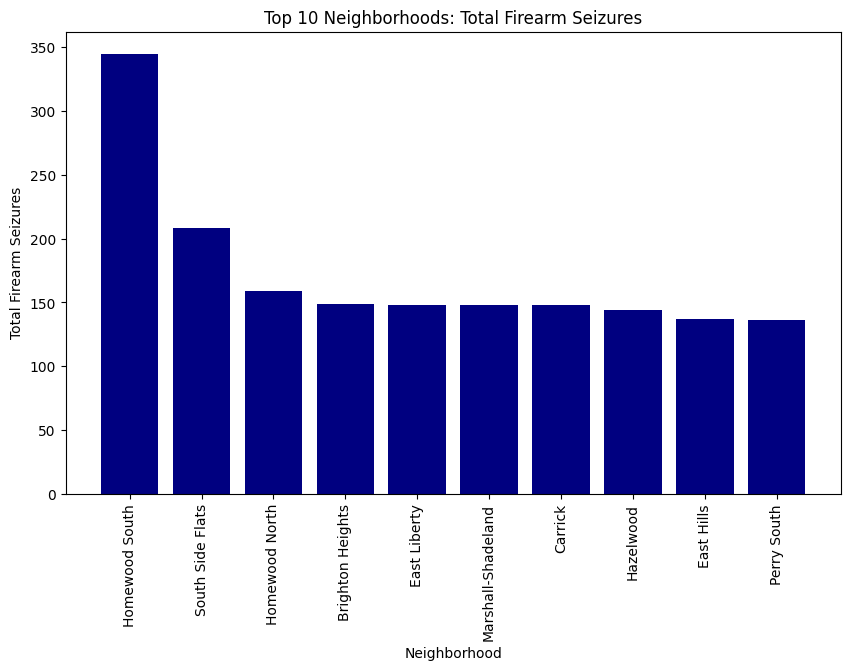

In [5]:
#Total Seizures Graph

#sorts each neightborhood by total firearm seizures in descending order
sort = sorted(fire_dict.items(), key=lambda x: x[1][0], reverse=True) 

#gets each neighborhood label and positions them
x = [key[0] for key in sort[:10]]
x_spacing = np.arange(len(x))

#gets each bar height for top 10
y = [value[1][0] for value in sort[:10]] 

#create bar graph
plt.figure(figsize=(10,6))
plt.bar(x, y, color="navy")

#add details and display
plt.title("Top 10 Neighborhoods: Total Firearm Seizures")
plt.xlabel("Neighborhood")
plt.ylabel("Total Firearm Seizures")
plt.xticks(x_spacing, x, rotation=90)
plt.show()


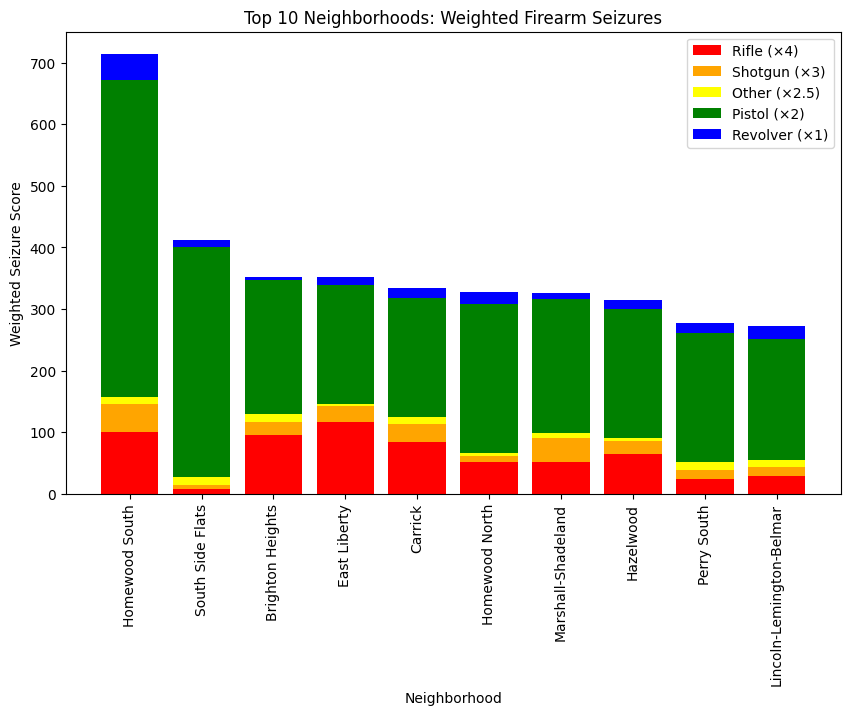

In [6]:
#Weighted Seizures Graph

#sort each neighborhood by the weighted firearm seizures in descending order
sort = sorted(fire_dict.items(), key=lambda x: x[1][6], reverse=True)

#array of each bar height for respective neighborhood by type for top 10
rifle_height = [value[1][1] * 4 for value in sort[:10]]
shotgun_height = [value[1][2] * 3 for value in sort[:10]]
other_height = [value[1][3] * 2.5 for value in sort[:10]]
pistol_height = [value[1][4] * 2 for value in sort[:10]]
revolver_height = [value[1][5] * 1 for value in sort[:10]]

#tells the location of the bottom of each stack
rifle_stack = np.array(rifle_height)
shotgun_stack = rifle_stack+ np.array(shotgun_height)
other_stack = shotgun_stack + np.array(other_height)
pistol_stack = other_stack + np.array(pistol_height)

#gets each neighborhood label and positions them
x = [item[0] for item in sort[:10]]
x_spacing = np.arange(len(x))

#adds the bars to graph
plt.figure(figsize=(10, 6))
plt.bar(x_spacing, rifle_height, color="red", bottom = 0,  label="Rifle (×4)")
plt.bar(x_spacing, shotgun_height, color="orange", bottom = rifle_stack, label="Shotgun (×3)")
plt.bar(x_spacing, other_height, color = "yellow", bottom=shotgun_stack, label="Other (×2.5)")
plt.bar(x_spacing, pistol_height,color="green", bottom=other_stack, label="Pistol (×2)")
plt.bar(x_spacing, revolver_height, color="blue", bottom=pistol_stack, label="Revolver (×1)")

#add details to graph
plt.title("Top 10 Neighborhoods: Weighted Firearm Seizures")
plt.xlabel("Neighborhood")
plt.ylabel("Weighted Seizure Score")
plt.xticks(x_spacing, x, rotation=90)
plt.legend()
plt.show()

# Export ranked list of neighborhoods by weighted firearm seizures

# Build DataFrame from sorted fire_dict data
ranked_firearm = [
    (item[0], item[1][6]) for item in sorted(fire_dict.items(), key=lambda x: x[1][6], reverse=True)
    if isinstance(item[0], str) and item[0].strip()
]
firearm_df_ranked = pd.DataFrame(ranked_firearm, columns=["Neighborhood", "Score"])
firearm_df_ranked["Rank"] = range(1, len(firearm_df_ranked) + 1)
firearm_df_ranked = firearm_df_ranked[["Neighborhood", "Rank"]]

# Export to tsv for further processing
firearm_df_ranked.to_csv("seizures_ranked.tsv", sep="\t", index=False)


In [13]:
# Load the dataset
df = pd.read_csv("arrests.tsv", sep='\t')

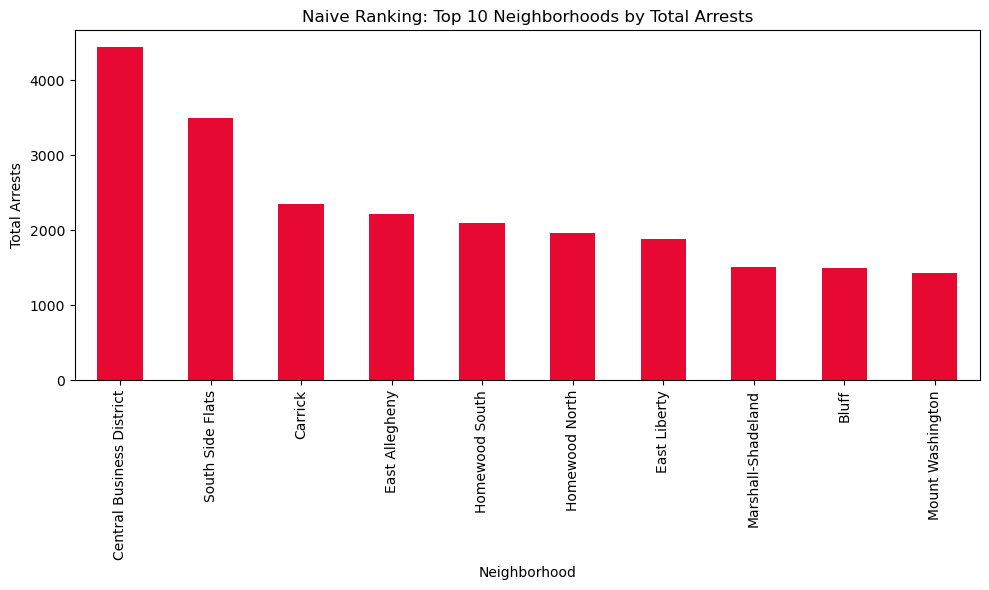

In [14]:
# Naive ranking of top 10 neighborhoods by just grouping them and then sorting based on counts of offenses

# Prepare a new grouped, sorted dataset
naive_counts = df['INCIDENTNEIGHBORHOOD'].value_counts().head(10)

# Plotting it
plt.figure(figsize=(10, 6))
naive_counts.plot(kind='bar', color='#e80932')
plt.title("Naive Ranking: Top 10 Neighborhoods by Total Arrests")
plt.xlabel("Neighborhood")
plt.ylabel("Total Arrests")
plt.tight_layout()
plt.show()

In [15]:
# Analysing the data in depth, looking for socially destructive offenses to make better sense of the data

# Defining top offenses and a function to help classify offense
top_destructive = ['2702 Aggravated Assault.', '2706 Terroristic Threats.', '3802(a)(1) DUI - General Impairment', '13(a)(30) Possession w', '2705 Recklessy Endangering Another Person.']

def classify_offense(offense):
    for top in top_destructive:
        if top in offense:
            return top
    return "Other"

# Polish the dataframe by splitting multiple offenses into multiple rows using explode() function
split_df = df.dropna(subset=['OFFENSES']).copy()
split_df = split_df.assign(OFFENSES=split_df['OFFENSES'].str.split('/')).explode('OFFENSES')
split_df['OFFENSES'] = split_df['OFFENSES'].str.strip()
split_df['OFFENSE_GROUP'] = split_df['OFFENSES'].apply(classify_offense)

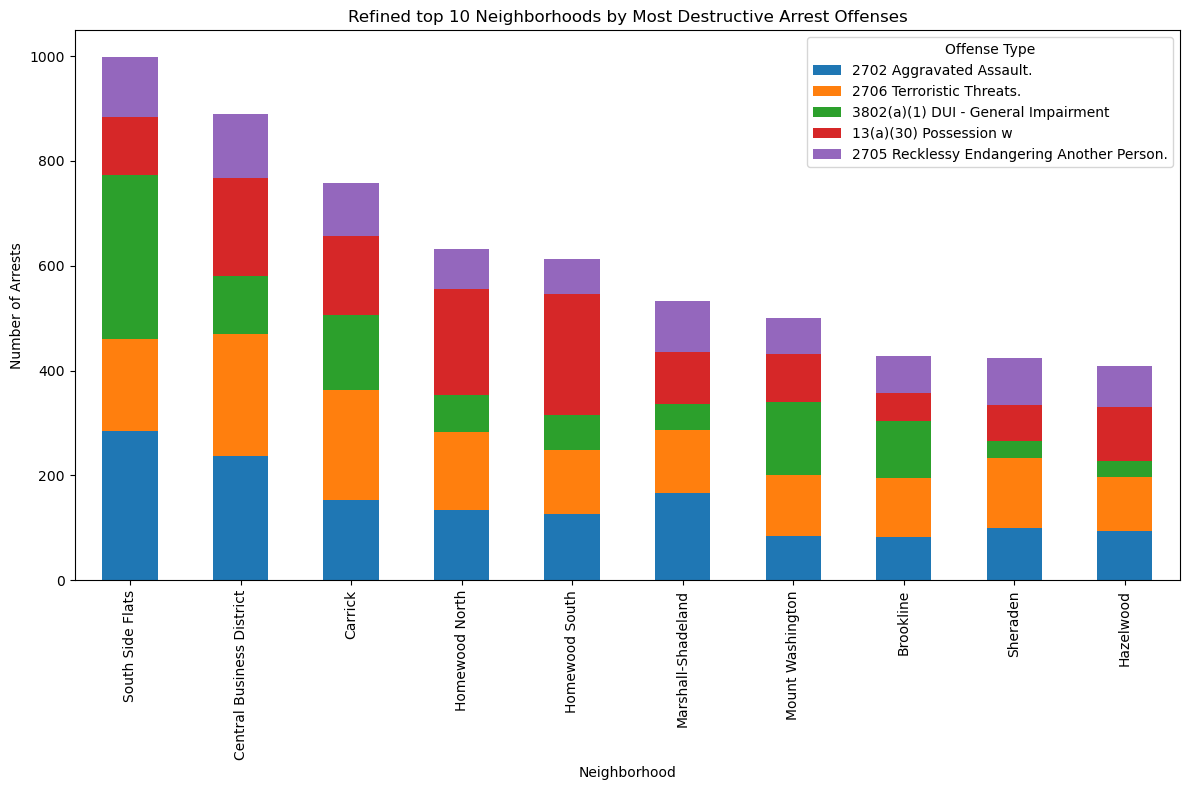

In [16]:
# Filter only the destructive offenses, group by neighborhood
destructive_dataset = split_df[split_df['OFFENSE_GROUP'].isin(top_destructive)]
destructive_n = destructive_dataset.groupby(['INCIDENTNEIGHBORHOOD', 'OFFENSE_GROUP']).size().unstack(fill_value=0)

# Find the total counts of destructive arrests and sort the data accordingly
destructive_n['Total'] = destructive_n.sum(axis=1)
top10 = destructive_n.sort_values('Total', ascending=False).head(10)

# Prepare the data for plotting by dropping the "Total" column
top10 = top10[top_destructive]

# Plot the graph
top10.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Refined top 10 Neighborhoods by Most Destructive Arrest Offenses")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Arrests")
plt.legend(title="Offense Type")
plt.tight_layout()
plt.show()

# Export ranked list of neighborhoods by aforementioned destructive offenses

full_destr_ranked = destructive_n["Total"].sort_values(ascending=False).reset_index()
full_destr_ranked = full_destr_ranked[full_destr_ranked["INCIDENTNEIGHBORHOOD"].notna()]
full_destr_ranked = full_destr_ranked[full_destr_ranked["INCIDENTNEIGHBORHOOD"].str.strip() != ""]
full_destr_ranked["Rank"] = range(1, len(full_destr_ranked) + 1)
full_destr_ranked = full_destr_ranked[["INCIDENTNEIGHBORHOOD", "Rank"]]
full_destr_ranked.columns = ["Neighborhood", "Rank"]

# Export to tsv file for further processing
full_destr_ranked.to_csv("arrests_ranked.tsv", sep="\t", index=False)


# Anaylsis/Conclusion


### John - In my analysis, I found that South Side Flats consistently ranked among the top neighborhoods in both arrests and firearm seizures. The data pointed to this area as a hotspot, with high enforcement activity across multiple categories. By exploring different metrics and comparing neighborhoods, I confirmed a strong trend: South Side Flats was a top offender. Based on this pattern, I believe the area needs more public safety, and if the police can't provide it, it'll have to come in the form of a crime-fighting vigilante.   
### Vanshaj - When I analyzed the data, I also noticed that South Side Flats ranked 1st in arrests and 2nd in both firearm seizures and overall enforcement activity. The consistency of these rankings caught my attention. It wasn’t just one metric, South Side Flats was at the top across the board. This led me to conclude that it plays a central role in the city’s law enforcement landscape. I think this neighborhood should be prioritized for further study or intervention, especially if we want to understand the bigger picture behind these numbers.

.

